## Albedo

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/Monthlies/other_gauss/catalog.html


Read OLR from NCEP reanalysis data. xarray.open_dataset can open and decode a dataset from a file path or an OpenDAP URL.

The dataset that we will be using is here: Catalog for long term mean data: https://psl.noaa.gov/thredds/catalog/Datasets/ncep.reanalysis/Monthlies/other_gauss/catalog.html

Data server catalog for all NOAA data: https://psl.noaa.gov/thredds/catalog/catalog.html

### Albedo at the Top of the Atmosphere (TOA)

In [2]:
file1 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/other_gauss/uswrf.ntat.mon.ltm.nc'
file2 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/other_gauss/dswrf.ntat.mon.ltm.nc'

with xr.open_dataset(file1) as ds1:
    #print(ds1)
    swup_toa=ds1.uswrf # Unit is W/m2
    print(swup_toa)
with xr.open_dataset(file2) as ds2:
    #print(ds2)
    swdn_toa=ds2.dswrf # Unit is W/m2
    print(swdn_toa)

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.DataArray 'uswrf' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    long_name:     Long Term Mean Monthly Mean of Upward Solar Radiation Flux
    valid_range:   [-100. 1600.]
    units:         W/m^2
    precision:     1
    var_desc:      Upward Solar Radiation Flux
    level_desc:    Nominal Top of atmosphere
    statistic:     Long Term Mean
    parent_stat:   Mean
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-7.5724274e-02  3.7919196e+02]
    _ChunkSizes:   [  1  94 192]
<xarray.DataArray 'dswrf' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [3]:
albedo_toa=swup_toa/swdn_toa   # monthly average albedo
albedo_ann_toa=swup_toa.mean("time")/swdn_toa.mean("time") # annual average albedo

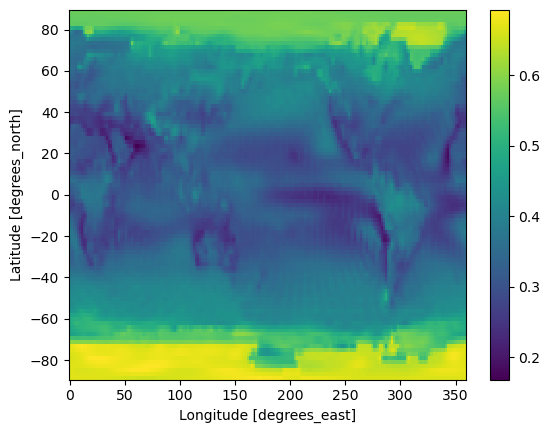

In [4]:
# plot annual average albedo
albedo_ann_toa.plot()

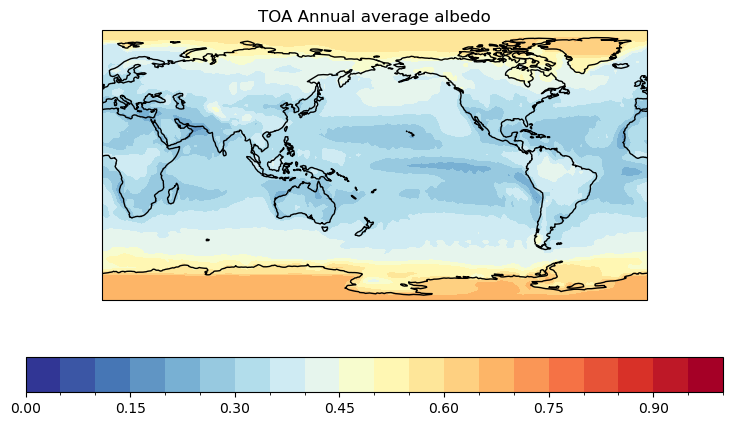

In [15]:
# Make a prettier plot
lev1=np.arange(0,1.05,0.05)
proj = ccrs.PlateCarree()
# color map
cmap1=plt.cm.RdYlBu_r

fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=albedo_ann_toa.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('TOA Annual average albedo')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 1
Explain the distribution of annual average albedo at the top of the atmosphere.

### Albedo at the top of the atmosphere at different seasons.

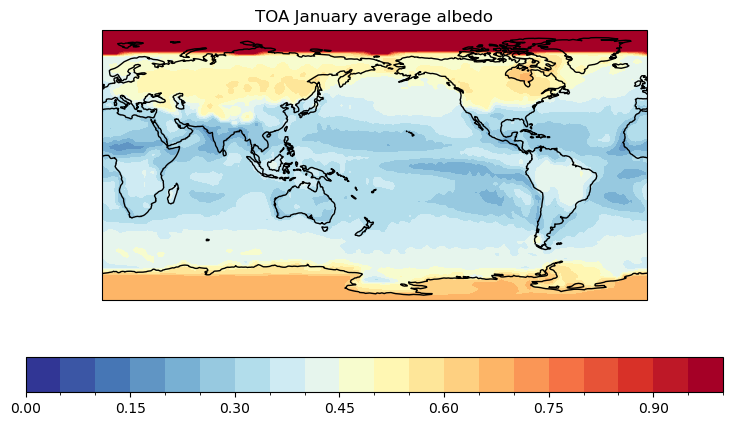

In [6]:
## January albedo
fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=albedo_toa.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('TOA January average albedo')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 2
Plot July albedo at TOA.

### Problem 3
Explain the differences in the distribution of January and July average albedo at the top of the atmosphere.

### Albedo at the surface

In [7]:
file3 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/surface_gauss/uswrf.sfc.mon.ltm.nc'
file4 = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/Monthlies/surface_gauss/dswrf.sfc.mon.ltm.nc'
with xr.open_dataset(file3) as ds3:
    #print(ds3)
    swup_sfc=ds3.uswrf # Unit is W/m2
    print(swup_sfc)
with xr.open_dataset(file4) as ds4:
    #print(ds4)
    swdn_sfc=ds4.dswrf # Unit is W/m2
    print(swdn_sfc)

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.DataArray 'uswrf' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -88.54
  * lon      (lon) float32 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes: (12/13)
    long_name:     Long Term Mean Monthly Mean Upward Solar Radiation Flux at...
    units:         W/m^2
    precision:     1
    GRIB_id:       211
    GRIB_name:     USWRF
    var_desc:      Upward Solar Radiation Flux
    ...            ...
    statistic:     Long Term Mean
    parent_stat:   Mean
    valid_range:   [-100.  800.]
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-1.6591849e-02  3.9261099e+02]
    _ChunkSizes:   [  1  94 192]
<xarray.DataArray 'dswrf' (time: 12, lat: 94, lon: 192)>
[216576 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.54 86.65 84.75 82.85 ... -84.75 -86.65 -8

/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/jungeunl/miniconda3/lib/python3.10/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [8]:
albedo_sfc=swup_sfc/swdn_sfc   # monthly average albedo
albedo_ann_sfc=swup_sfc.mean("time")/swdn_sfc.mean("time") # annual average albedo

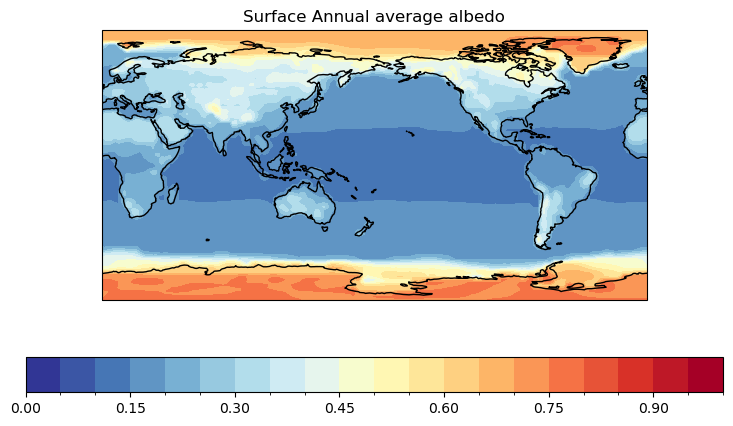

In [16]:
fig1 = plt.figure(figsize=(9,5))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
cs=albedo_ann_sfc.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=lev1, cmap=cmap1, add_colorbar=False, add_labels=False)
ax.coastlines()
plt.title('Surface Annual average albedo')
fig1.colorbar(cs, orientation='horizontal') # color map

### Problem 4
Explain the distribution of annual average surface albedo.

### Problem 5
Plot January surface albedo.

### Problem 6
Plot July surface albedo

### Problem 7
Explain the differences in the distribution of January and July average albedo at the surface

### Problem 8
Explain the differences in the distribution of the albedo at the surface and the top of the atmosphere.